# Project: Investigate a Dataset : TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This dataset is extracted from kaggle : [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). In this data set I will try to analyze the data set to answer questions such as:

1.Which genres is most popular in movie making ?

2.Which Genre has more popularity?

3.Are movie releses incresing with time?

4.Visualisation of yearly revenue with time

### Some of the attributes of data set:

id                      :Index or id

imdb_id                 :Unique ID given by IMDB

popularity              :Popularity of the movie

budget                  :Budget of the movie

revenue                 :Revenue by the movie

original_title          :Film Name

director                :Director or Directoers of the film

keywords                :Keywords related to film

runtime                 :Film length or duration

genres                  :Type of movie

production_companies    :Companies that have invested to the film

vote_count              :Number of votes

vote_average            :Averat=ge vote rating

release_year            :released year

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline

#loading the data sets
df_movie  = pd.read_csv('./data/tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#assessing the sample data 
df_movie.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# info about the data sets
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#To know how many null values are present
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#to know how many duplicates are present
df_movie.duplicated().sum()

1

In [6]:
#to delete the duplicates
df_movie.drop_duplicates(inplace = True)

In [7]:
#varifying if duplicates are deleted
df_movie.duplicated().sum()

0

In [8]:
#keeping only the required columns
df_movie.drop(['cast','homepage','tagline','overview','release_date', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [9]:
#creating the new csv with updated (required columns)
df_movie.to_csv('./data/tmdb-movies-updated.csv')

In [10]:
#Loading the new csv
df_movie_updated  = pd.read_csv('./data/tmdb-movies-updated.csv',encoding = "ISO-8859-1")

In [11]:
#info about the new csv
df_movie_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 15 columns):
Unnamed: 0              10865 non-null int64
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 1.2+ MB


In [12]:
# filling the blank spaces with NaN values
df_movie_updated['director'].fillna('NaN');
df_movie_updated['genres'].fillna('NaN');
df_movie_updated['production_companies'].fillna('NaN');
df_movie_updated['imdb_id'].fillna('NaN');
df_movie_updated['keywords'].fillna('NaN');

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1. Which genres is most popular in movie making? 

In this question we will try to analyze what type of genre films production companies are producing a lot.

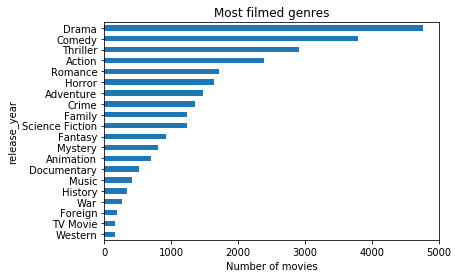

In [13]:
# Get all genres
all_genres = df_movie_updated['genres'].str.cat(sep='|')
all_genres = pd.Series(all_genres.split('|'))

# Count the genres
count = all_genres.value_counts(ascending=True)

# Plot
ax = count.plot.barh()
ax.set(title='Most filmed genres',
       xlabel='Number of movies',
       ylabel = 'release_year')

plt.show()

By graph we can say more films tend to be Drama according to the analysis. The next places is for comedy movies, thriller movies, action movies, romance movies according. That means more films are made with this genres.

### 2. Which Genre has more popularity?
In this question we will try to analyze which genre is more popular in the audience. The graph plotted is 2d graph (popularity v/s genre) 

In [14]:
#Finding different types of genre present in the data set
a = np.unique(all_genres)

In [15]:
# creating DataFrame
df_genre = pd.DataFrame({'genre' : a, 'popularity' : 0})

In [16]:
df_genre.head()

,genre,popularity
0,Action,0
1,Adventure,0
2,Animation,0
3,Comedy,0
4,Crime,0


In [17]:
#Code to sum all the popularity of perticular genre and store it to perticular genre column
for index, value in df_genre['genre'].iteritems():
    for a, b in df_movie_updated['genres'].iteritems():
        if (str(value) in str(b)):
            df_genre['popularity'].loc[index] += df_movie_updated['popularity'].loc[a]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
df_genre.head()

,genre,popularity
0,Action,2208.238255
1,Adventure,1697.915054
2,Animation,595.674975
3,Comedy,2247.759649
4,Crime,1008.635823


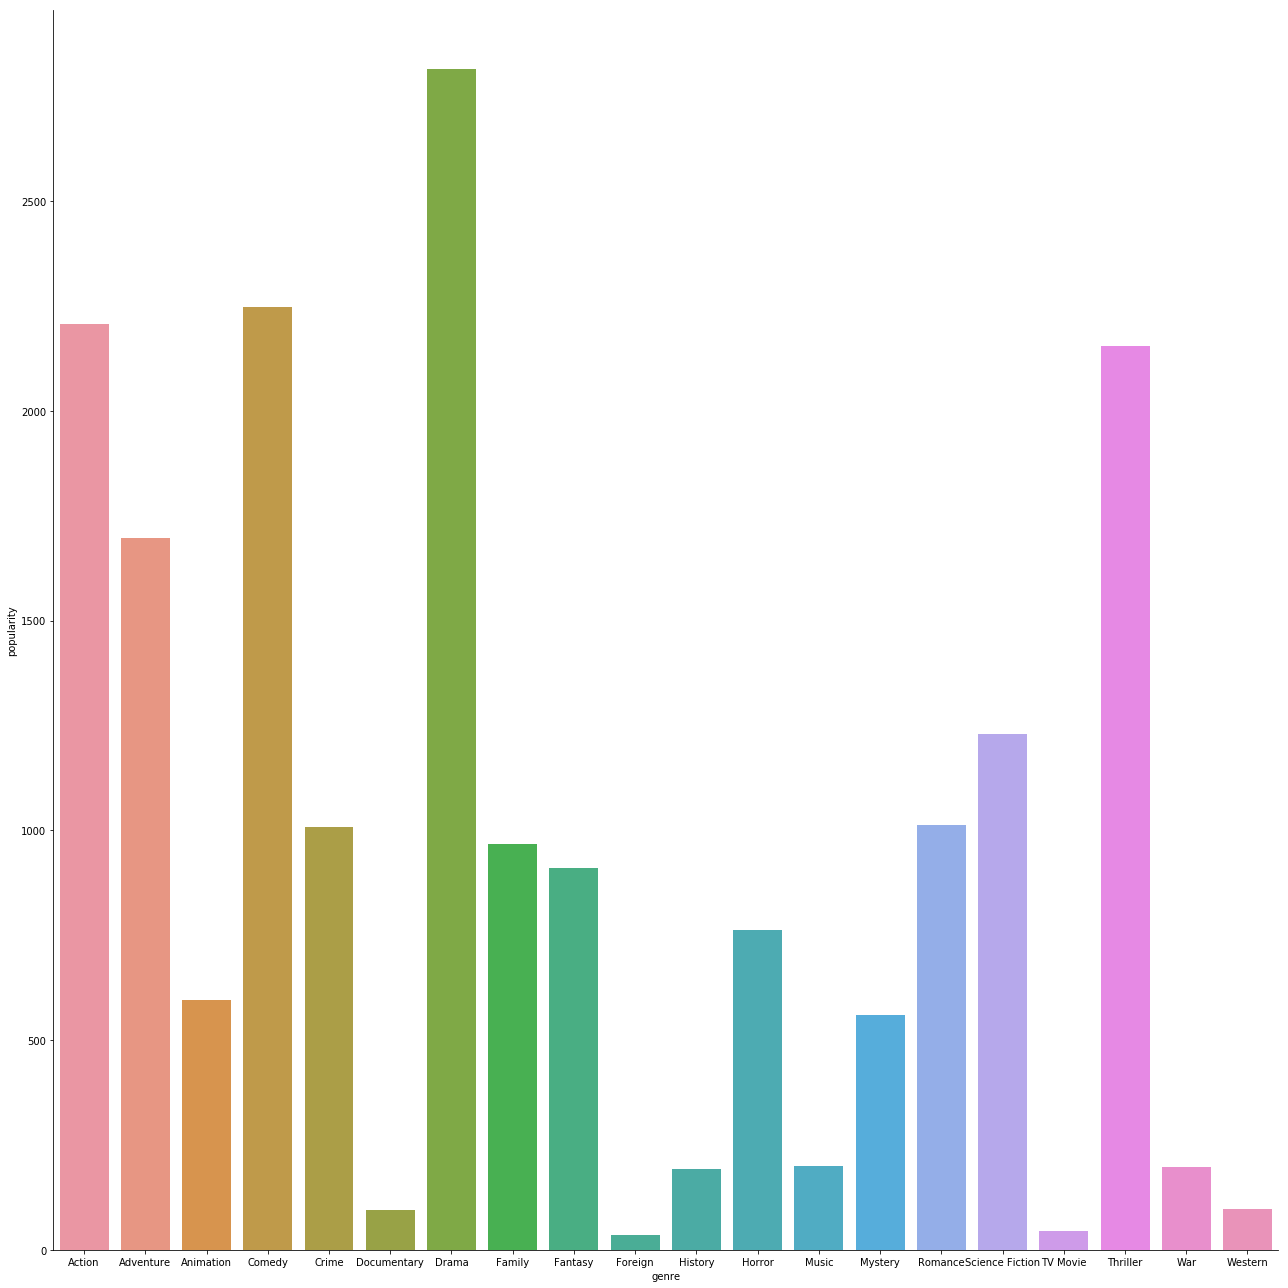

In [19]:
#plotting
sns.factorplot(x= 'genre', y = 'popularity', data = df_genre, kind = 'bar', size = 18);

By graph we can say people tend to watch more movies that is related to drama. Next comes comedy films, action films and thriller films accordingly

### 3. Are movie releses with time incresing?
In this question i will try to analyze weather the movie making is increasing with years 

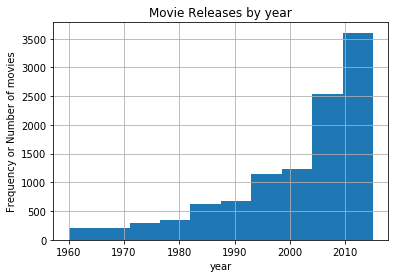

In [20]:
df_movie_updated['release_year'].hist();
plt.title('Movie Releases by year')
plt.xlabel('year')
plt.ylabel('Frequency or Number of movies');

Yes, By graph we can say there are more movies that are released with year, the graph is incresing exponentially.

### 4. Visualisation of yearly revenue  
In this analysis we will try to analyze the trend of the revenue of the film industry. The graph plotted is a 2d graph(Total revenue v/s year)

In [21]:
#finding the max year in the data set
df_movie_updated['release_year'].max()

2015

In [22]:
#finding the min year in the data set
df_movie_updated['release_year'].min()

1960

In [23]:
# creating DataFrame
ab = pd.DataFrame({'year' : range(1960, 2015), 'total' : 0})

In [24]:
ab.head()

,total,year
0,0,1960
1,0,1961
2,0,1962
3,0,1963
4,0,1964


In [25]:
for index, value in ab['year'].iteritems():
    for a, b in df_movie_updated['release_year'].iteritems():
        if (b == value):
            ab['total'].loc[index] += df_movie_updated['revenue'].loc[a]

#ab = df_movie_updated.groupby('release_year')['revenue'].sum()            

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
ab.head()

,total,year
0,145005000,1960
1,337720188,1961
2,215579846,1962
3,187404989,1963
4,340981782,1964


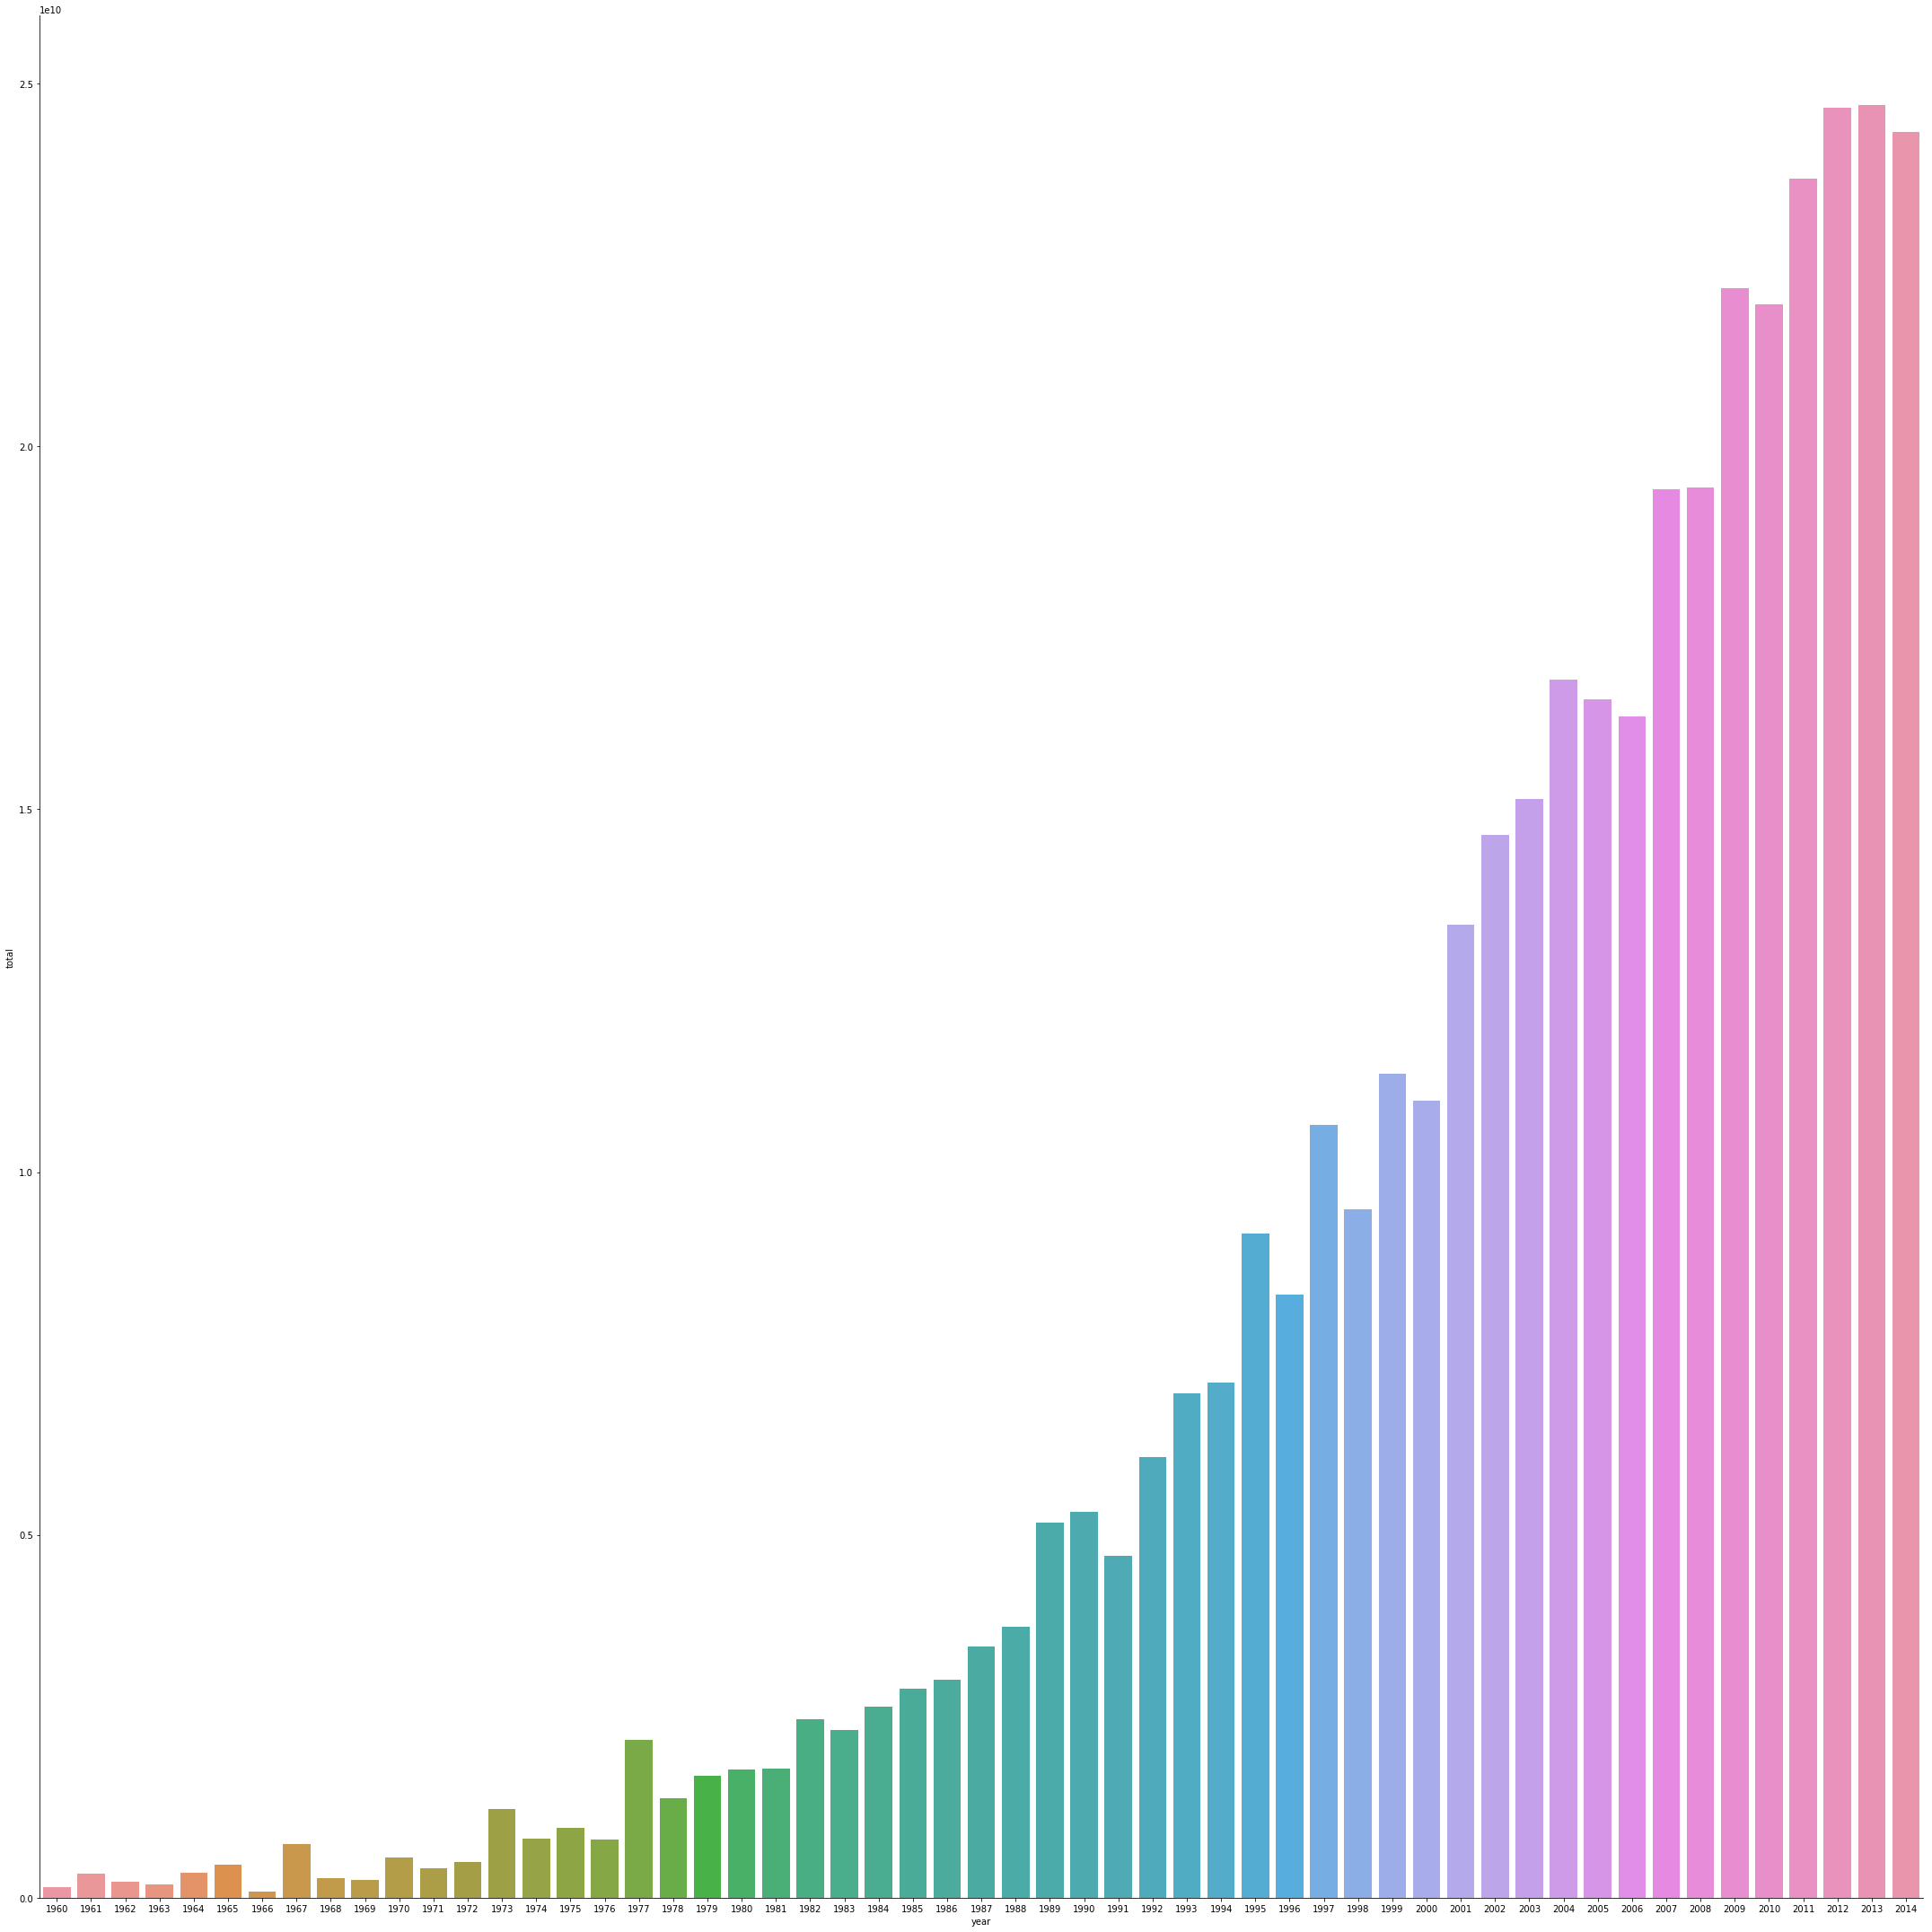

In [27]:
sns.factorplot(x= 'year', y = 'total', data = ab, kind = 'bar', size = 30);

According to visualisation, we can say that the total revenue is increasing with time. The graph is incresing exponentially 

<a id='conclusions'></a>
## Conclusions



To Summerize, the movie data contained most of the data that was required to do the analysis that was proposed in the initial question. This analysis was mostly based on the genre. I found difficulty in producing graph(especially last one) as there were many values in x axis.
To put it in a nutshell:

1.Which genres is most popular in movie making?

Ans: By graph we can say more films tend to be Drama according to the analysis. The next places is for comedy movies, thriller movies, action movies, romance movies according. That means more films are made with this genres.

2.Which Genre has more popularity?

Ans: By graph we can say people tend to watch more movies that is related to drama. Next comes comedy films, action films and thriller films accordingly

3.Are movie releses with time incresing?

Ans: Yes, By graph we can say there are more movies that are released with year, the graph is incresing exponentially.

4.Visualisation of yearly revenue

Ans: According to visualisation, we can say that the total revenue is increasing with time. The graph is incresing exponentially